In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

data = pd.read_csv('transdo.csv', parse_dates = ['Day of Req Date'], index_col = "Day of Req Date")
data = data.rename(index=str, columns={"Count of Transaction Id": "Tx"})
data.index.names = ['Date']
data.index = pd.to_datetime(data.index)


data.head()

,Tx
Date,
2018-05-31,7886
2018-05-30,9890
2018-05-29,8649
2018-05-28,9486
2018-05-27,9470


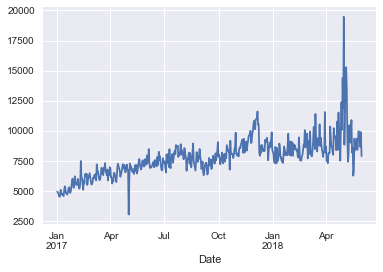

In [106]:
%matplotlib inline

data['Tx'].plot()

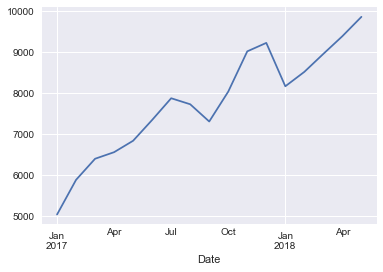

In [112]:
#Monthly mean
data['Tx'].resample('M').mean().plot()

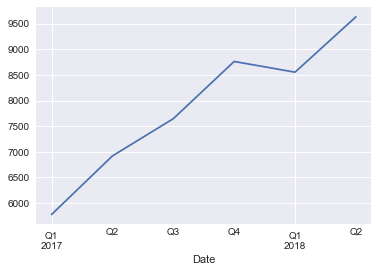

In [113]:
#Quarter mean
data['Tx'].resample('Q').mean().plot()

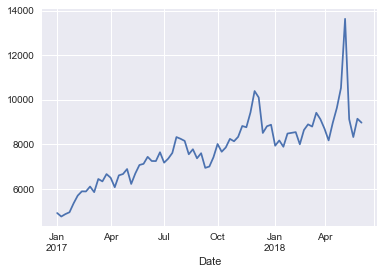

In [114]:
#Weekly mean
data['Tx'].resample('W').mean().plot()

/Users/faris/anaconda3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


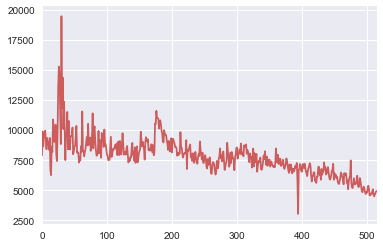

In [107]:
sns.tsplot([data.Tx], color="indianred")

/Users/faris/anaconda3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


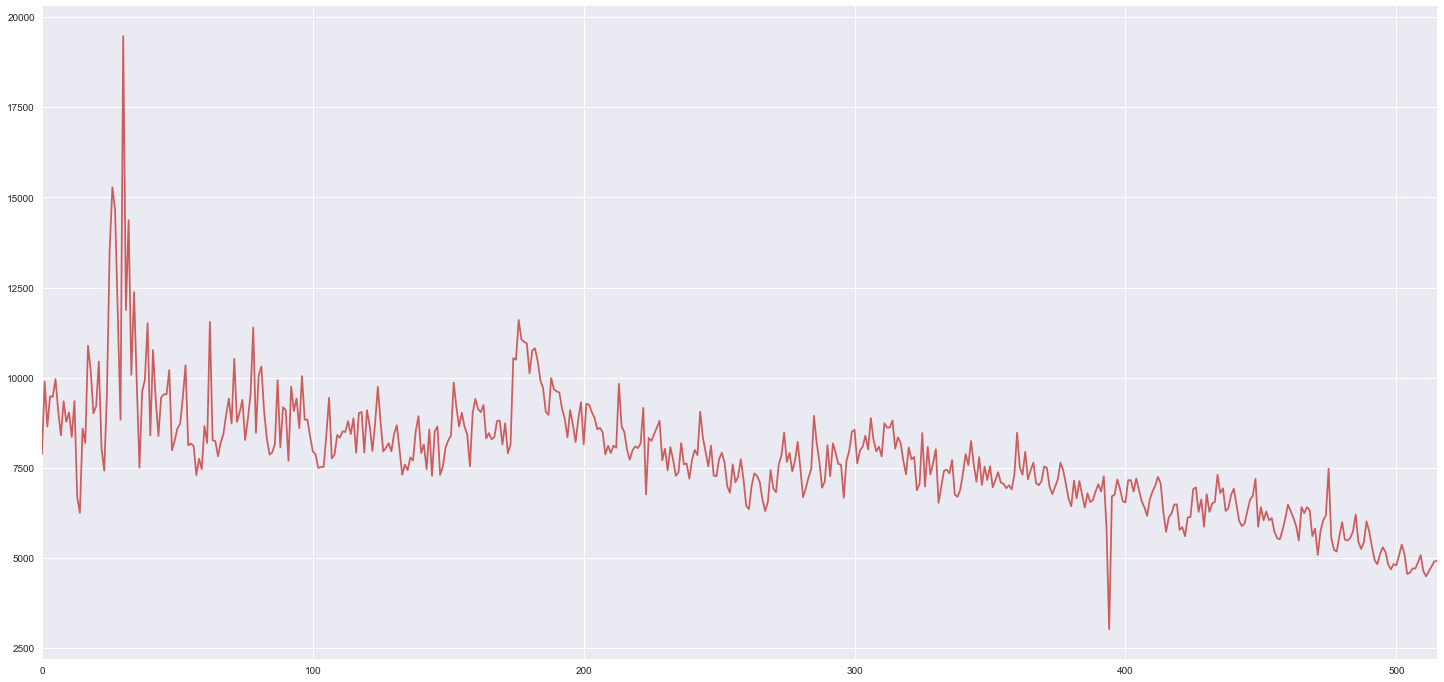

In [110]:
# Time Series Splot With Confidence Interval Lines But No Lines
plt.figure(figsize=(25, 12))

sns.tsplot([data.Tx], err_style="ci_bars", color="indianred")

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516 entries, 2018-05-31 to 2017-01-01
Data columns (total 1 columns):
Tx    516 non-null int64
dtypes: int64(1)
memory usage: 8.1 KB


In [118]:
# fit model
model = ARIMA(data['Tx'].astype(float), order=(5,1,0), dates=data.index)
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.Tx   No. Observations:                  515
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4225.744
Method:                       css-mle   S.D. of innovations            885.219
Date:                Tue, 12 Jun 2018   AIC                           8465.489
Time:                        12:37:39   BIC                           8495.198
Sample:                    05-30-2018   HQIC                          8477.132
                         - 01-01-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.8896     15.387     -0.513      0.608     -38.047      22.268
ar.L1.D.Tx    -0.6009      0.044    -13.627      0.000      -0.687      -0.514
ar.L2.D.Tx    -0.3241      0.051     -6.415      0.0

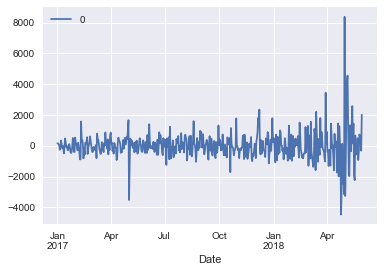

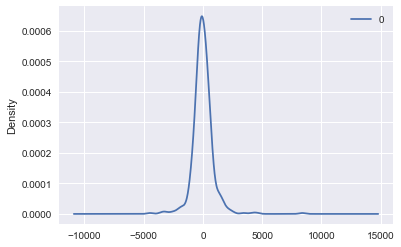

                 0
count   515.000000
mean      3.250954
std     887.393935
min   -4469.413674
25%    -390.863299
50%     -50.800788
75%     360.273665
max    8370.891590


In [121]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())